In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sys

sys.path.append('../../')

from helpers.data_helpers import get_binance_data

In [14]:
ps = pd.read_csv('psar_BTCUSDT.csv')

In [36]:
#Get Volatility Model (Minutely Data with Predicted Periods)
df = pd.read_csv('Finalized_vol_model.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

In [54]:
#Now lets add some signals 
#Signals file should have datetime column in minutes and a column called Signal which is 0, 1, -1
signals_file_name = 'psar_btc_signals.csv'
signals_df = pd.read_csv(signals_file_name)
signals_df['datetime'] = pd.to_datetime(signals_df['datetime'])
signals_df = signals_df.set_index('datetime')
signals_df = signals_df[['Signal']]


df = pd.merge(df, signals_df, left_index=True, right_index=True, how='left')

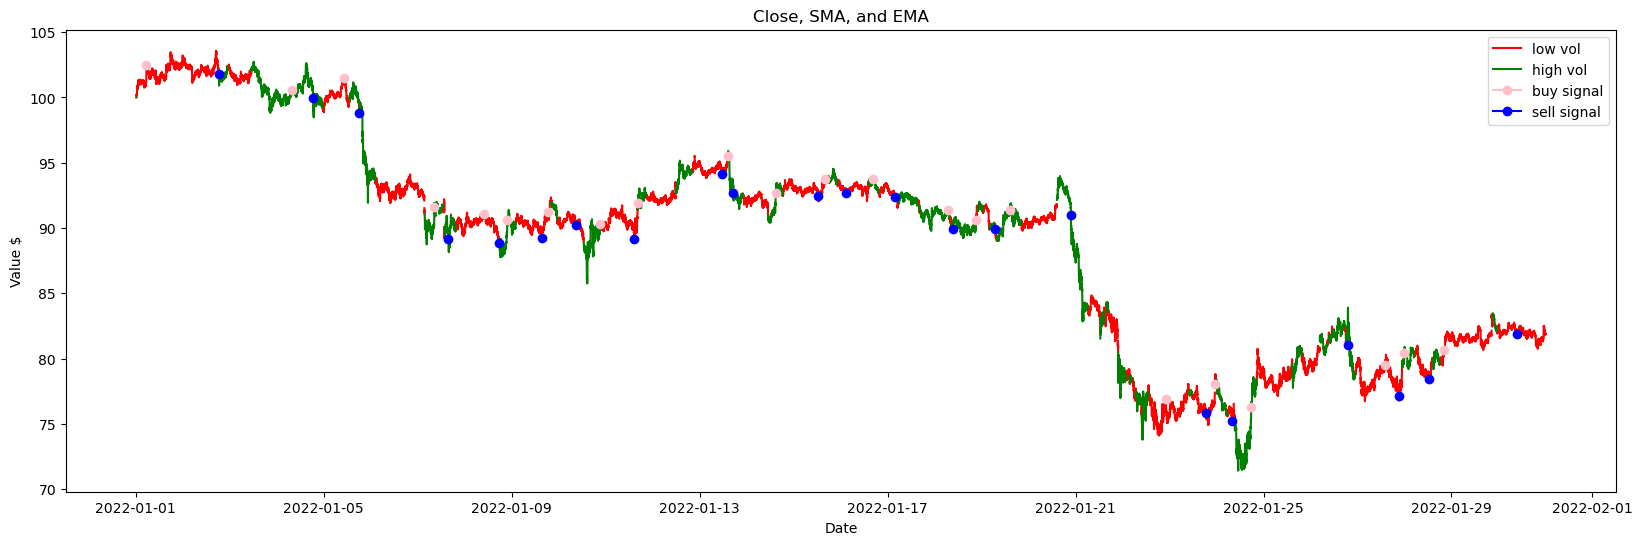

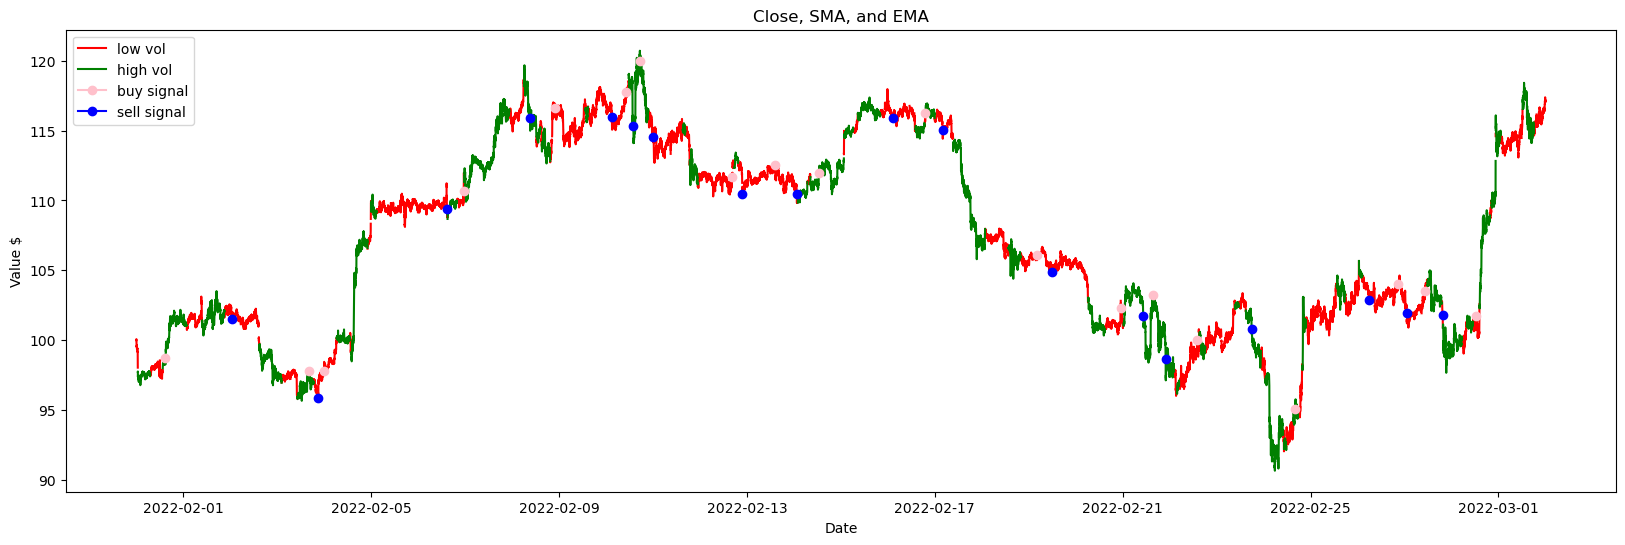

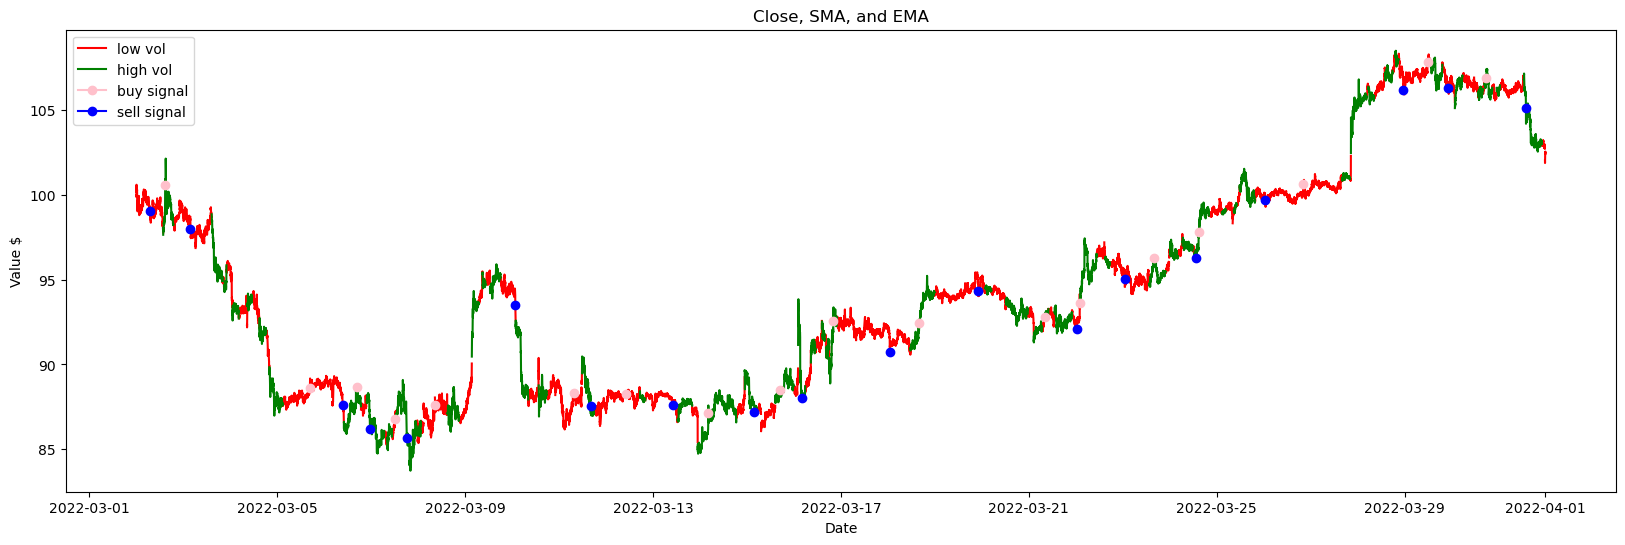

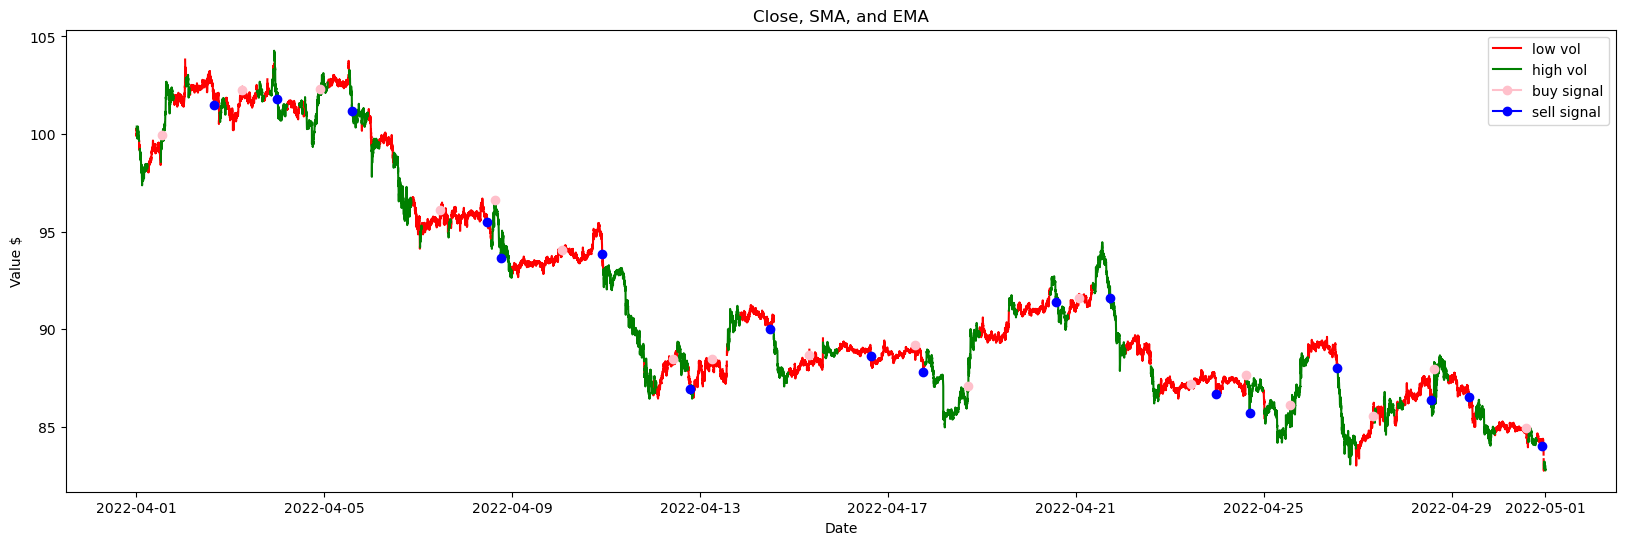

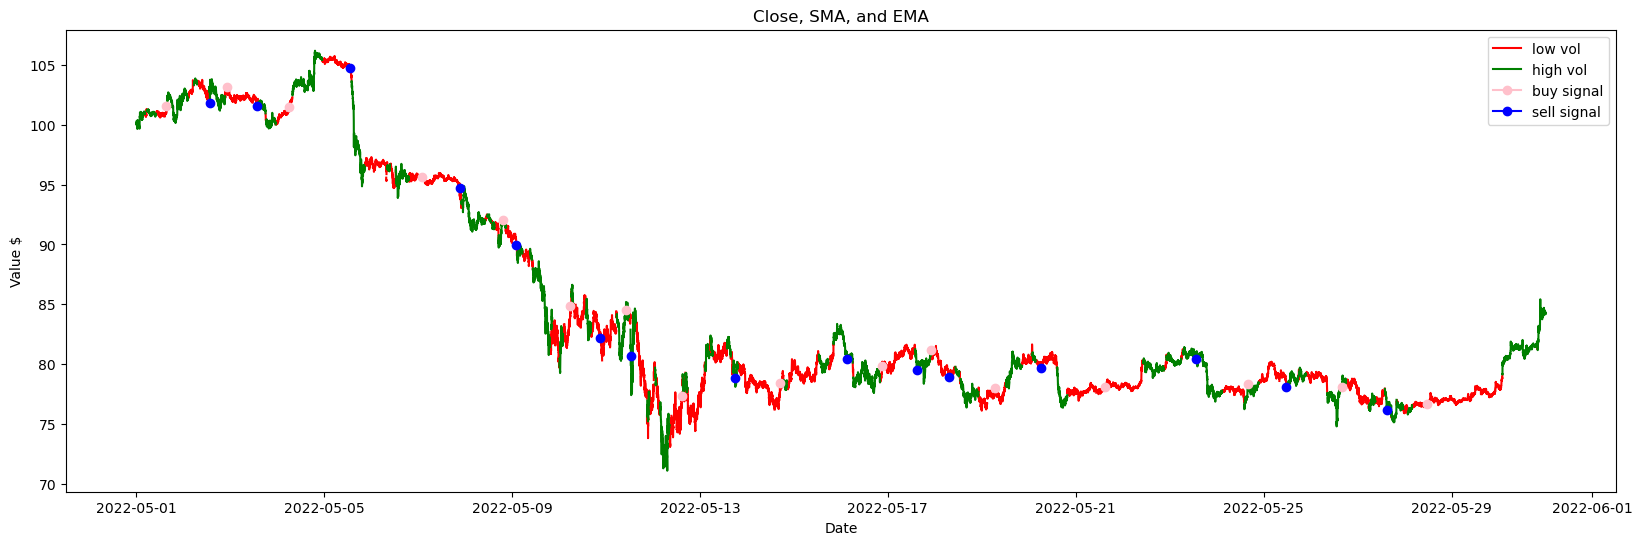

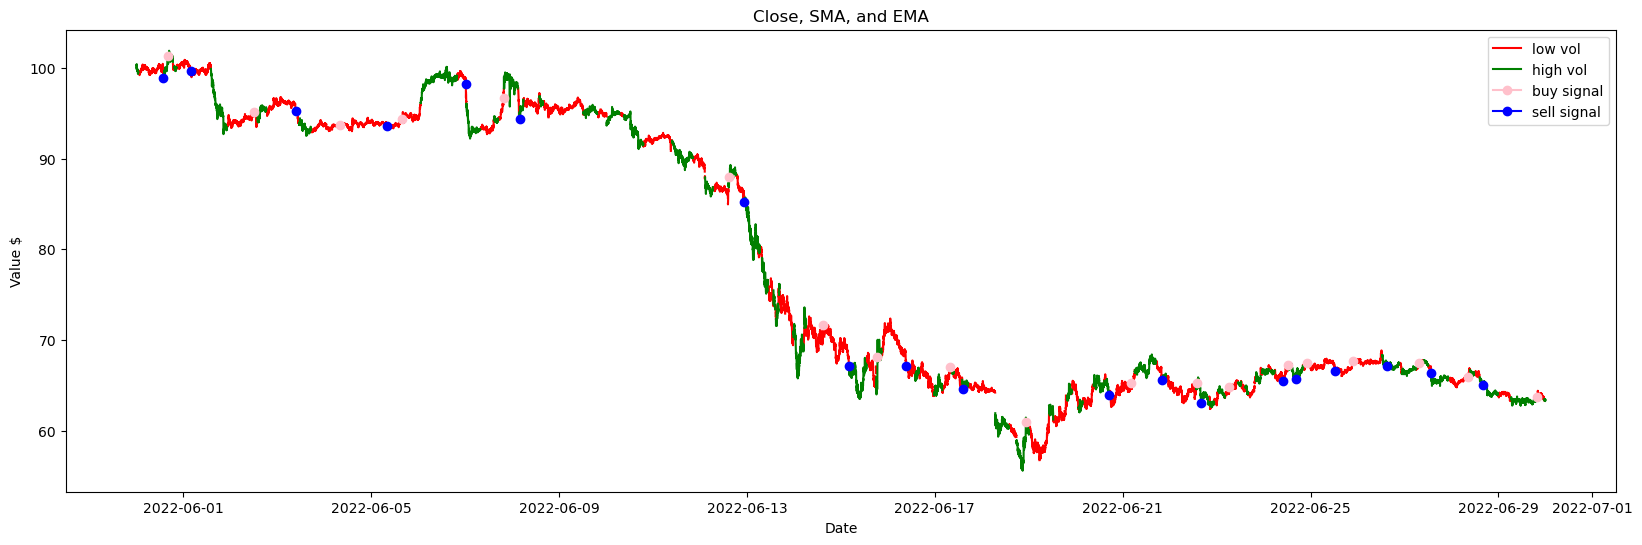

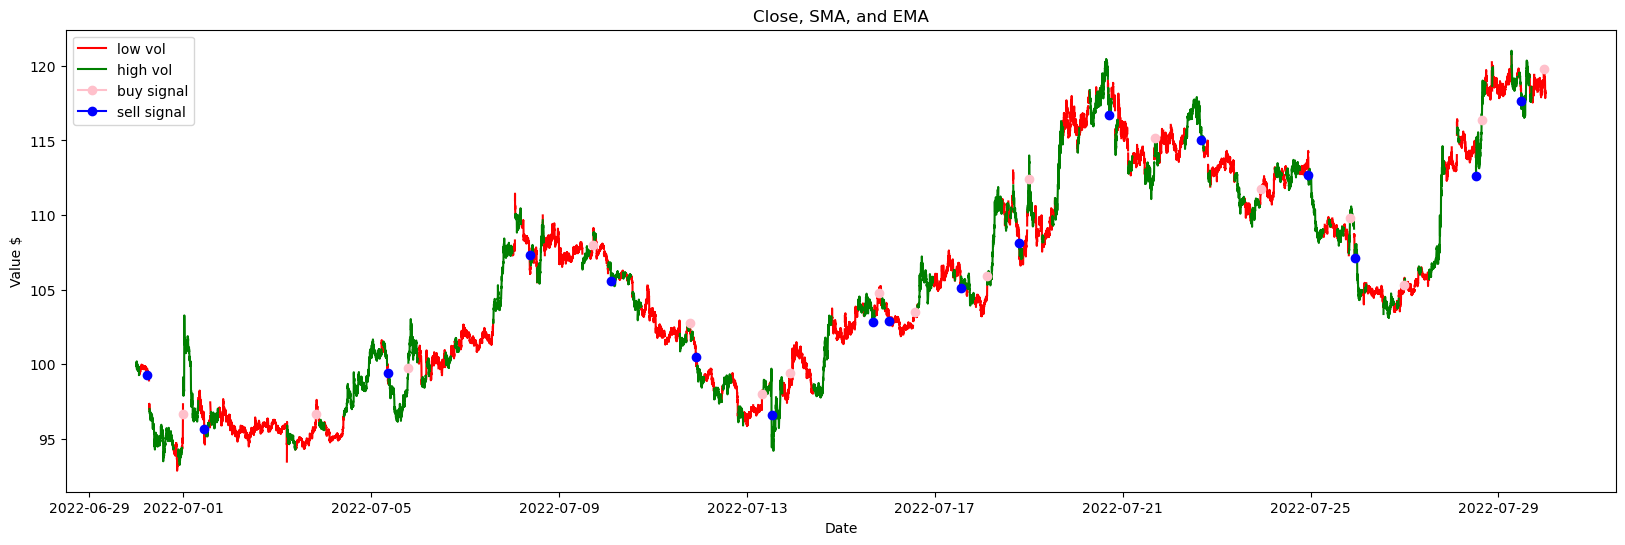

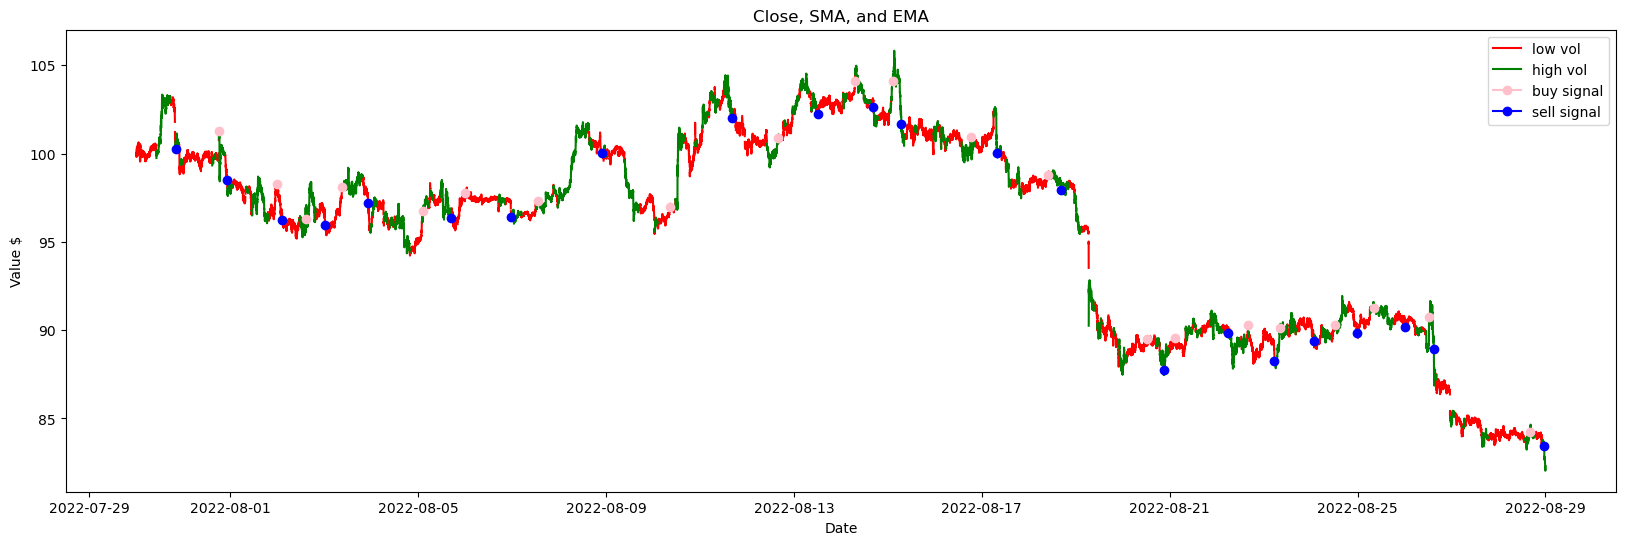

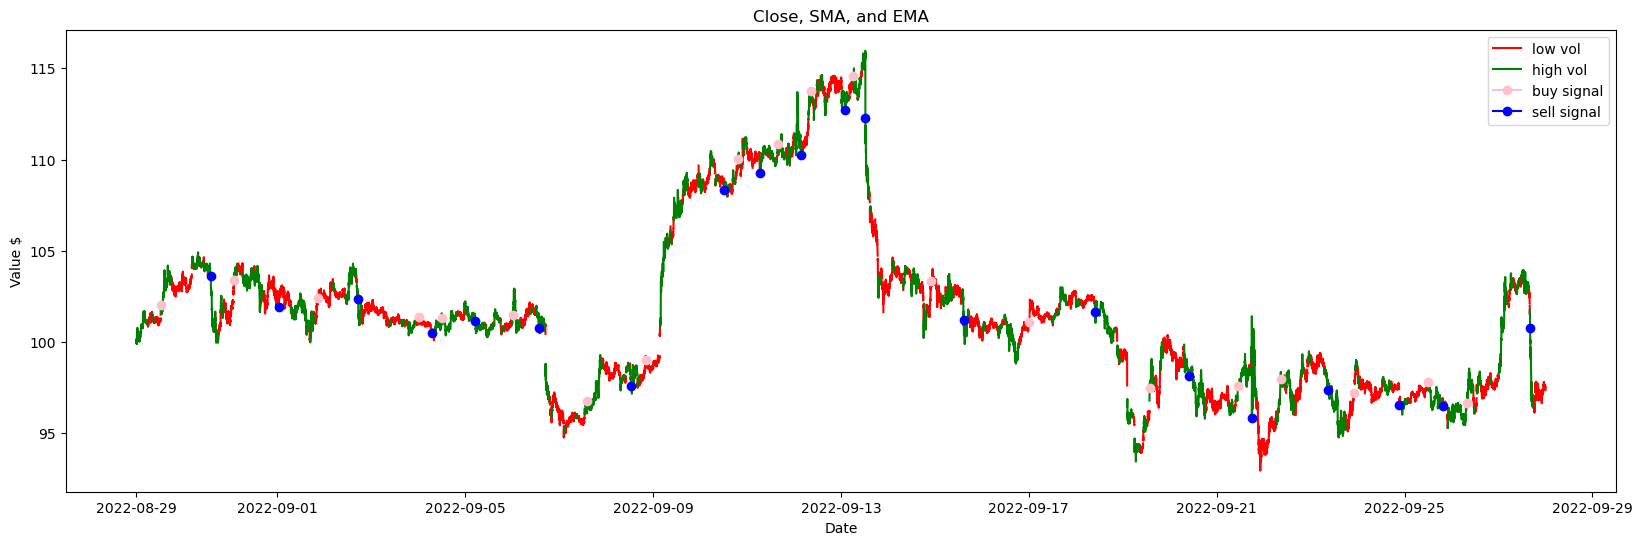

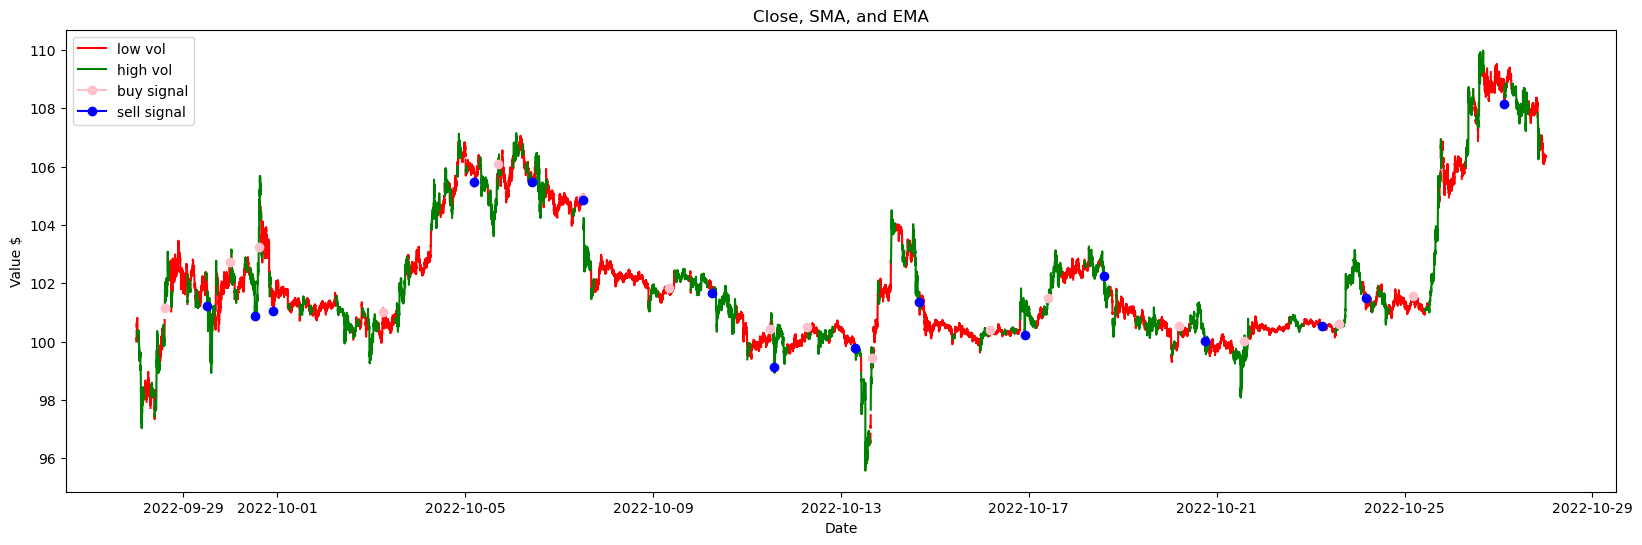

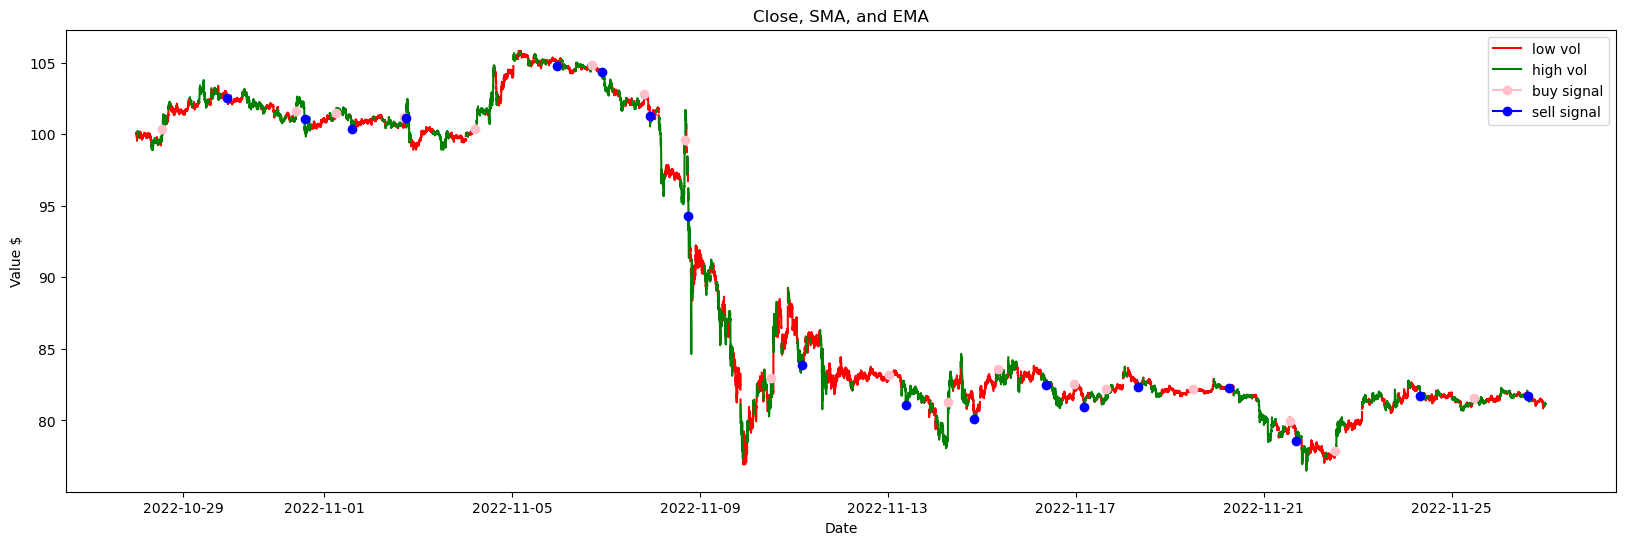

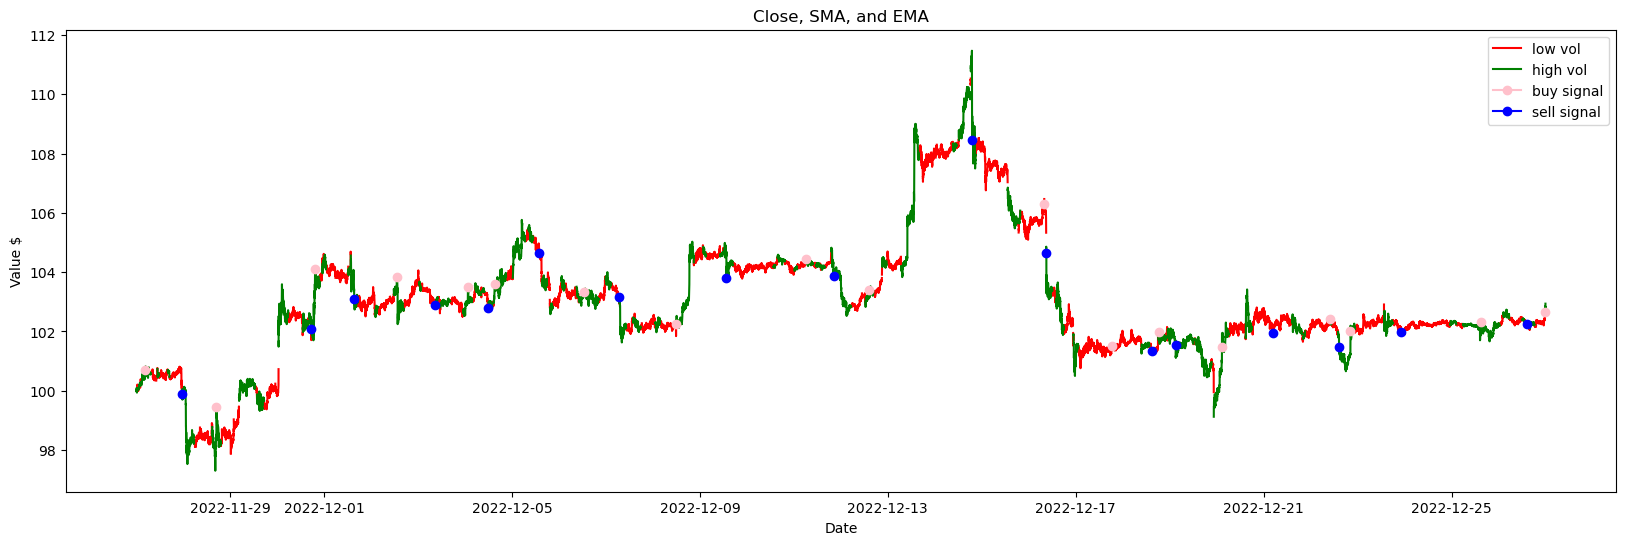

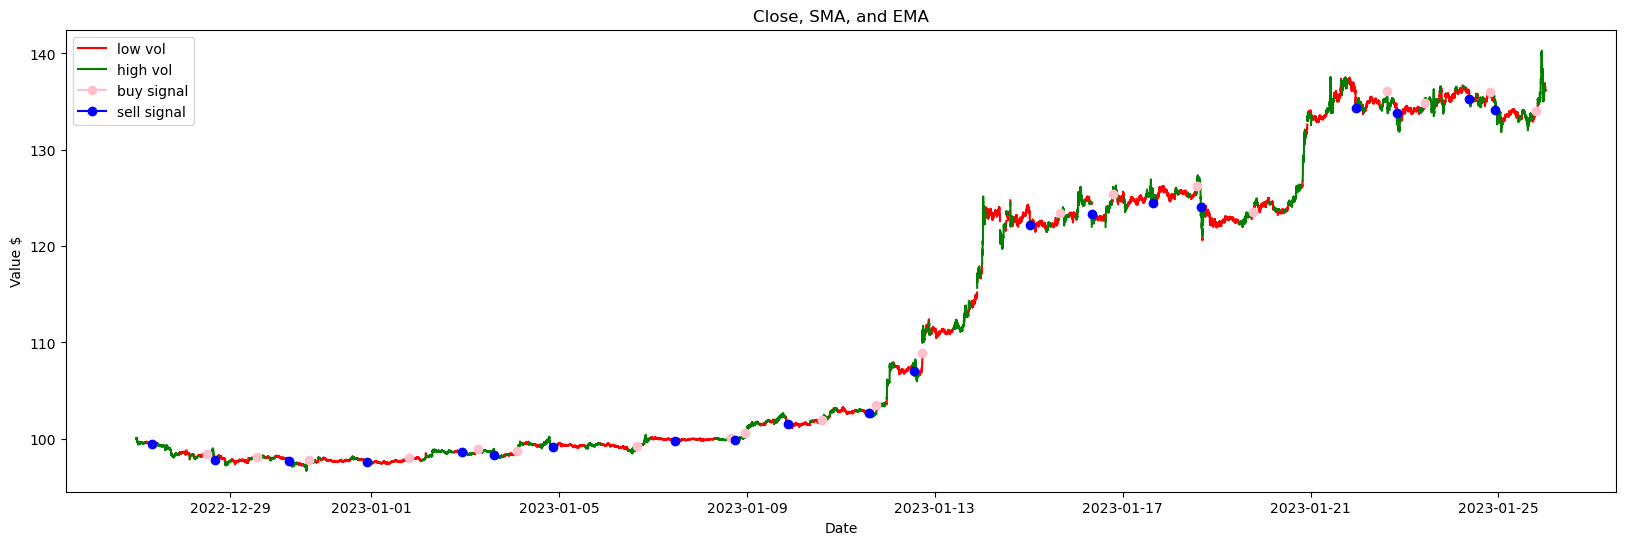

In [74]:
#now lets see how the signals look on the graph

start = '2022-01-01'
end = '2023-01-01'

step = 30 # how many days to see at once

start_datetime = datetime.datetime.strptime(start, '%Y-%m-%d')
end_datetime = datetime.datetime.strptime(end, '%Y-%m-%d')
start_datetime = start_datetime.replace(tzinfo=datetime.timezone.utc)
end_datetime = end_datetime.replace(tzinfo=datetime.timezone.utc)
jump = datetime.timedelta(days=step)

while start_datetime < end_datetime:

    temp_end = start_datetime + jump
    
    plot_sample = df.loc[start_datetime:temp_end].copy()

    base_value = 100
    plot_sample['Normalized Price'] = plot_sample['Close'] / plot_sample['Close'].iloc[0] * base_value

    plot_sample['low vol'] = np.where(plot_sample['vol'] == 'low vol', plot_sample['Normalized Price'], None)
    plot_sample['high vol'] = np.where(plot_sample['vol'] == 'high vol', plot_sample['Normalized Price'], None)

    plot_sample['buy signal'] = np.where(plot_sample['Signal'] == 1, plot_sample['Normalized Price'], None)
    plot_sample['sell signal'] = np.where(plot_sample['Signal'] == -1, plot_sample['Normalized Price'], None)

    # Plot the Close, SMA, and EMA
    plt.figure(figsize=(20, 6))
    plt.plot(plot_sample.index, plot_sample['low vol'], label='low vol', color = 'red')
    plt.plot(plot_sample.index, plot_sample['high vol'], label='high vol', color = 'green')
    
    plt.plot(plot_sample.index, plot_sample['buy signal'], label='buy signal', marker = 'o', color = 'pink')
    plt.plot(plot_sample.index, plot_sample['sell signal'], label='sell signal', marker = 'o', color = 'blue')

    plt.xlabel('Date')
    plt.ylabel('Value $')
    plt.title('Close, SMA, and EMA')
    plt.legend()

    start_datetime = temp_end